In [1049]:
import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 9.3 Epidemic Dynamics

**Simple SIR Model - Activity ONE**

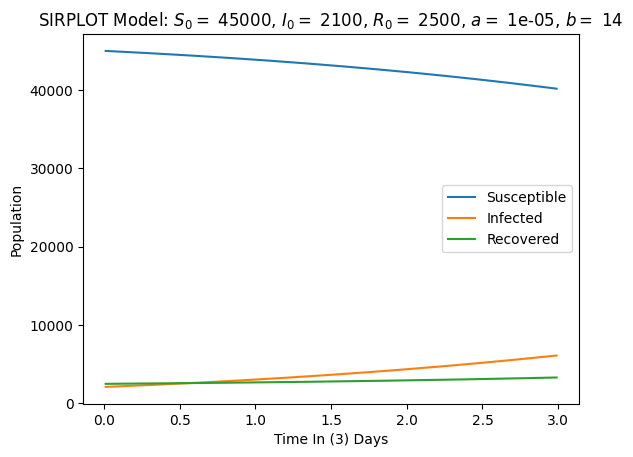

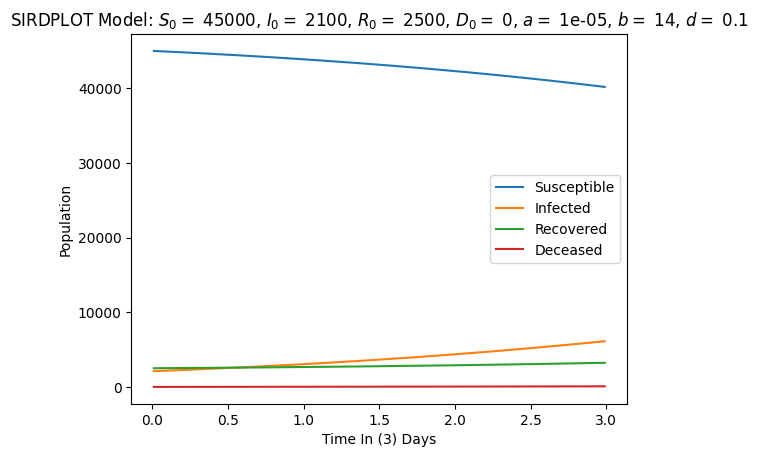

In [1050]:
#Use Pseudocode from Calculus in Context, Chapter 2 page 69 to plot the 3 functions S, I and R. Use a (.00001) and b (14) as variables instead of numbers
#Use a fixed plot window with y as the total height and fix the number of days you want to explore.
#Once it is working, add a new rate equation for Deaths by splitting up the "Recovered" 2 equations - for example 10 percent pass to death and 90 percent pass to recovered.
#Please comment your code.

import matplotlib.pyplot as plt

# SIRPLOT - Plots the data for a given SIR model
# Inputs:
#   S - Integer that represents the number of susceptible people in a population to a given disease
#   I - Integer that represents the number of infected people in a population to a given disease
#   R - Integer that represents the number of recovered people in a population to a given disease
#   tf - Integer that represents the final time for the model in days
#   a - Float that represents how infectious a disease is
#   b - Integer that represents how fast someone recovers from a disease
# Algorithm:
#   * Grab the initial values in the model that were fed as input parameters
#   * Create the lists that are to be returned and set t equal to the initial time
#   * Calculate the number of steps based on the time that this model is to run
#   * Calculate the the change in t for the model off of the final and initial times and the number of steps
#   * Traverse over the number of steps
#       * Calculate SPrime, IPrime, and RPrime respectively
#       * Calculate the change in S, I, and R respectively
#       * Update the values of t, S, I, and R respectively
#       * Append the values of t, S, I, and R to their lists respectively
#   * Plot the data
# Output:
#   This function does not return a value it plots the data for an SIR model
def SIRPLOT(S, I, R, tf, a, b):
    S_0 = S
    I_0 = I
    R_0 = R
    t = 0
    tList = []
    SList = []
    IList = []
    RList = []
    steps = 100 * (tf - t)
    deltaT = (tf - t) / steps
    for k in range(1, steps):
        SPrime = -a * S * I
        IPrime = a * S * I - I / b
        RPrime = I / b
        deltaS = SPrime * deltaT
        deltaI = IPrime * deltaT
        deltaR = RPrime * deltaT
        t += deltaT
        S += deltaS
        I += deltaI
        R += deltaR
        tList.append(t)
        SList.append(S)
        IList.append(I)
        RList.append(R)
    plt.plot(tList,SList,label='Susceptible')
    plt.plot(tList,IList,label='Infected')
    plt.plot(tList,RList,label='Recovered')
    plt.xlabel(f'Time In ({tf}) Days')
    plt.ylabel('Population')
    plt.title(f'SIRPLOT Model: $S_{0} =$ {S_0}, $I_{0} =$ {I_0}, $R_{0} =$ {R_0}, $a =$ {a}, $b =$ {b}')
    plt.legend()
    plt.show()

# SIRDPLOT - Returns lists pertaining to susceptible, infected, recovered, and deceased populations for a given disease
# Inputs:
#   S - Integer that represents the number of susceptible people in a population to a given disease
#   I - Integer that represents the number of infected people in a population to a given disease
#   R - Integer that represents the number of recovered people in a population to a given disease
#   D - Integer that represents the number of deceased people in a population to a given disease
#   tf - Integer that represents the final time for the model in days
#   a - Float that represents how infectious a disease is
#   b - Integer that represents how fast someone recovers from a disease
#   d - Float that represents the fatality rate of the from a disease
# Algorithm:
#   * Grab the initial values in the model that were fed as input parameters
#   * Create the lists that are to be returned and set t equal to the initial time
#   * Calculate the number of steps based on the time that this model is to run
#   * Calculate the the change in t for the model off of the final and initial times and the number of steps
#   * Traverse over the number of steps
#       * Calculate SPrime, IPrime, RPrime, and DPrime respectively
#       * Calculate the change in S, I, R, and D respectively
#       * Update the values of t, S, I, R, and D respectively
#       * Append the values of t, S, I, R, and D to their lists respectively
#   * Plot the data
# Output:
#   This function does not return a value it plots the data for an SIRD model
def SIRDPLOT(S, I, R, D, tf, a, b, d):
    S_0 = S
    I_0 = I
    R_0 = R
    D_0 = D
    t = 0
    tList = []
    SList = []
    IList = []
    RList = []
    DList = []
    steps = 100 * (tf - t)
    deltaT = (tf - t) / steps
    for k in range(1,steps):
        SPrime = -a * S * I
        IPrime = a * S * I - I / b
        RPrime = (1 - d) * I / b
        DPrime = d * I / b
        deltaS = SPrime * deltaT
        deltaI = IPrime * deltaT
        deltaR = RPrime * deltaT
        deltaD = DPrime * deltaT
        t += deltaT
        S += deltaS
        I += deltaI
        R += deltaR
        D += deltaD
        tList.append(t)
        SList.append(S)
        IList.append(I)
        RList.append(R)
        DList.append(D)
    plt.plot(tList,SList,label='Susceptible')
    plt.plot(tList,IList,label='Infected')
    plt.plot(tList,RList,label='Recovered')
    plt.plot(tList,DList,label='Deceased')
    plt.xlabel(f'Time In ({tf}) Days')
    plt.ylabel('Population')
    plt.title(f'SIRDPLOT Model: $S_{0} =$ {S_0}, $I_{0} =$ {I_0}, $R_{0} =$ {R_0}, $D_{0} =$ {D_0}, $a =$ {a}, $b =$ {b}, $d =$ {d}')
    plt.legend()
    plt.show()

Si = 45000
Ii = 2100
Ri = 2500
Di = 0
tf = 3
a = 0.00001
b = 14
d = 0.1

SIRPLOT(Si, Ii, Ri, tf, a, b)
SIRDPLOT(Si, Ii, Ri, Di, tf, a, b, d)

**Question 1:**
Test your model with a = .00001 and b = 10 over 50 days and check with the given textbook. Show the output. Provide simple context for this model with comments or text.

**<span style = "color:red;">Question 1 Model</span>**

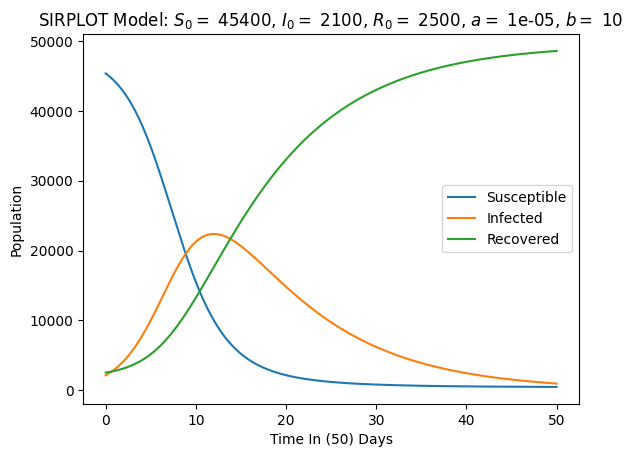

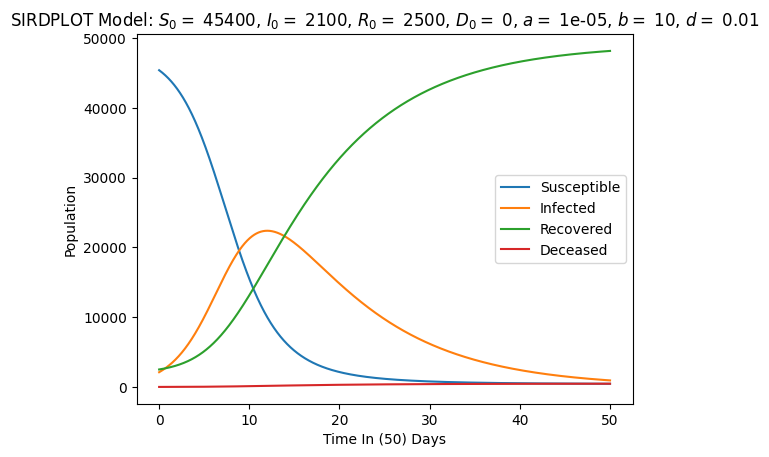

In [1051]:
Si = 45400
Ii = 2100
Ri = 2500
Di = 0
tf = 50
a = 0.00001
b = 10
d = 0.01

SIRPLOT(Si, Ii, Ri, tf, a, b)
SIRDPLOT(Si, Ii, Ri, Di, tf, a, b, d)

**<span style = "color:red;">Question 1 Response</span>**

In this example, we have two separate plots modeling both an SIR model and an SIRD model. In this example the initial populations for each model (where applicable) are:

- $S_{0} = 45,400$ - Initial population that is susceptible to the disease.
- $I_{0} = 2,100$ - Initial population that is currently infected with the disease.
- $R_{0} = 2,500$ - Initial population that has recovered from the disease with immunity.
- $D_{0} = 0$ - Initial population that has died from the disease.
- $a = 0.00001$ - Transmission coefficient.
- $b = 10$ - Days taken to recover from the disease.
- $d = 0.01$ - Death rate of the disease.

The first plot is a plot of the SIR model that does not incorporate a death rate whereas the second plot is of an SIRD model that has a death rate of 0.01. Both models are fed with with the same initial populations, transmission coefficient, and recovery coefficient. Only the SIRD model incorporates the death rate.

From the plots we see that with this transmission coefficient and recovery rate the susceptible population begins to decrease immediately because they are getting infected. Since people in this population are starting to get infected this means that the infected population begins to grow. With the recovery rate in this model we see that the recovered population also starts to grow because people who were initially infected are starting to recover from the disease. For both models the amount of infected seems to peak around day 11 or 12. After this time in the model the infected population begins to decrease along with the susceptible population. At the end of the model the recovered population in both models levels out as the number of susceptible people is nearing zero.

For the SIRD model the main difference from this model and the SIR model is that there is a deceased population that we keep track of. As time in the model progresses we see that the deceased population grows rather slowly and then eventually levels out as the number of infected and susceptible decreases. This makes sense because as there are less people to get infected there is going to be less people who can potentially die from the disease. Similar to the SIR model we also see the recovered population grow and eventually level out at the end of the time period in the model.

**Question 2:** Using your SIRPLOT code above, explore what happens when you change the length of time a disease takes to recover (which may happen with a new medicine for example). Provide examples from your model in code blocks and context and explanation in textblocks.



**<span style = "color:red;">Question 2 - Part (a) Model</span>**

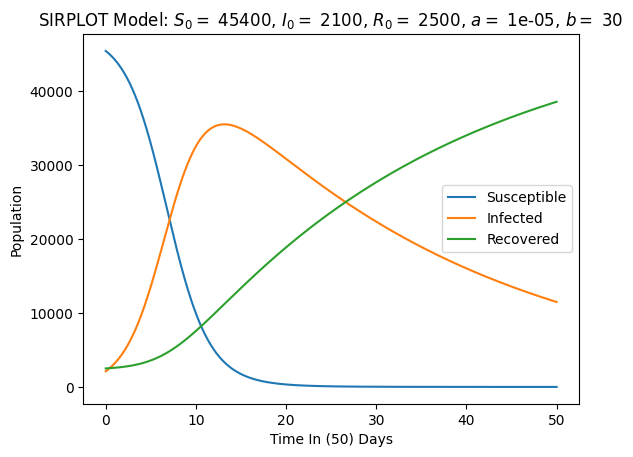

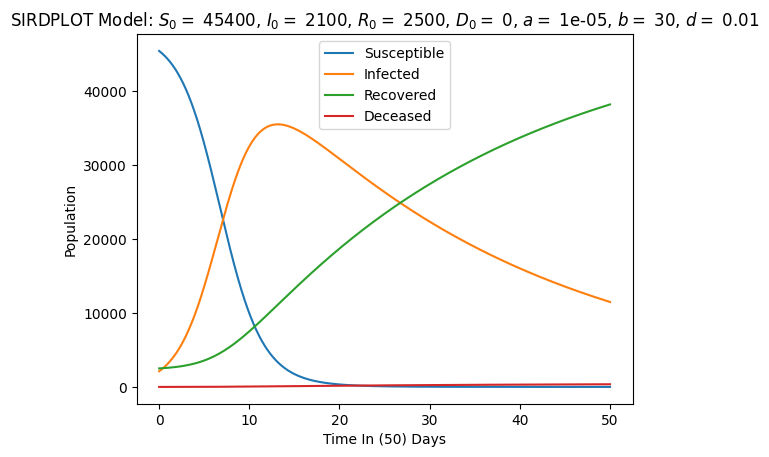

In [1052]:
Si = 45400
Ii = 2100
Ri = 2500
Di = 0
tf = 50
a = 0.00001
b = 30
d = 0.01

SIRPLOT(Si, Ii, Ri, tf, a, b)
SIRDPLOT(Si, Ii, Ri, Di, tf, a, b, d)

**<span style="color:red;">Question 2 - Part (a) Response</span>**

For this example we are exploring what happens when we increase the time taken for recovery in both models. In this example the initial populations and rates / coefficients for both the SIR and SIRD model are:

- $S_{0} = 45,400$ - Initial population that is susceptible to the disease.
- $I_{0} = 2,100$ - Initial population that is currently infected with the disease.
- $R_{0} = 2,500$ - Initial population that has recovered from the disease with immunity.
- $D_{0} = 0$ - Initial population that has died from the disease.
- $a = 0.00001$ - Transmission coefficient.
- $b = 30$ - Days taken to recover from the disease.
- $d = 0.01$ - Death rate of the disease.

Since we kept the other populations and rates / coefficients similar to that of question 1, we can draw comparisons between that of question 1 and what we have in this model. In question 1 the time taken for someone to recover from the model was 10 days and in this model it is 30 days. Making this change we see that there is a difference in the infected population that is immediately visible. Examining this further we see that the max number of infected people to increase in the model and this is because the time taken to recover from the disease is longer than that of question 1. Keeping this in mind we can see that at the end of the model there is less people who have recovered from the disease. This is of course because it is taking longer for people to recover from the disease.

Inspecting the SIRD model, most of what was mentioned previously about the SIR model is also true but we have to comment about the deceased population in the model. Because it is taking longer for people to recover from the disease at the end of the model we see that the deceased population is still increasing. At the end of both models we see that the number of susceptible people is similar to that of question 1 for both the SIR and SIRD model. This largely due to the fact people in this population of the model are either deceased or infected, or they have already recovered with immunity.

**<span style = "color:red;">Question 2 - Part (b) Model</span>**

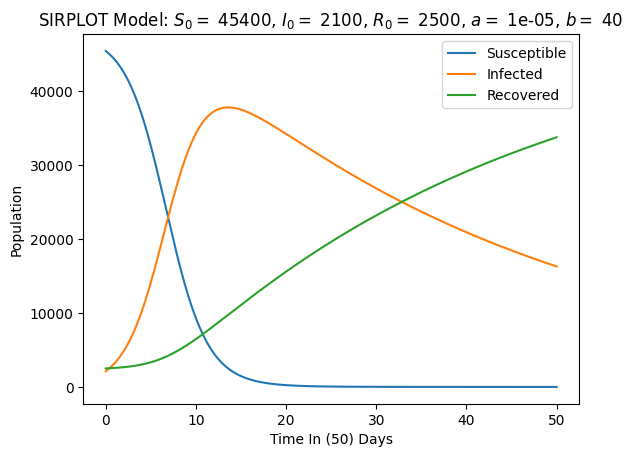

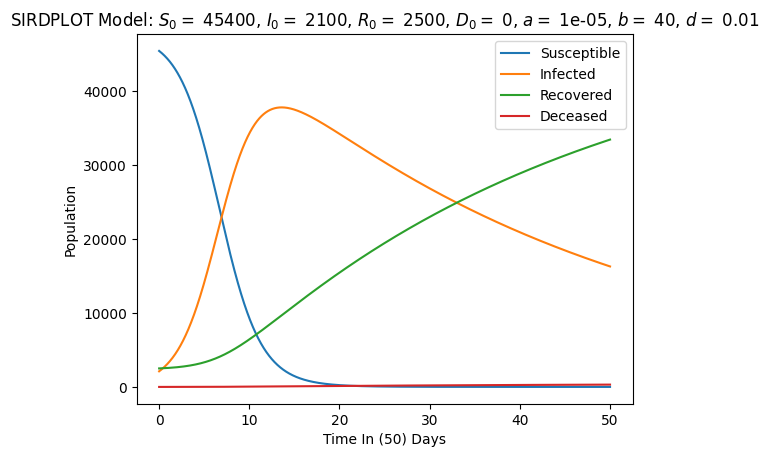

In [1053]:
Si = 45400
Ii = 2100
Ri = 2500
Di = 0
tf = 50
a = 0.00001
b = 40
d = 0.01

SIRPLOT(Si, Ii, Ri, tf, a, b)
SIRDPLOT(Si, Ii, Ri, Di, tf, a, b, d)

**<span style = "color:red;">Question 2 - Part (b) Response</span>**

With this new model we once again increased the time taken for someone to recover from the disease. The initial populations and rates / coefficients for this model are:

- $S_{0} = 45,400$ - Initial population that is susceptible to the disease.
- $I_{0} = 2,100$ - Initial population that is currently infected with the disease.
- $R_{0} = 2,500$ - Initial population that has recovered from the disease with immunity.
- $D_{0} = 0$ - Initial population that has died from the disease.
- $a = 0.00001$ - Transmission coefficient.
- $b = 40$ - Days taken to recover from the disease.
- $d = 0.01$ - Death rate of the disease.

In this new model we see that the max number of infected people has once again increased relative to the time where it peaks. The susceptible population decreases close to the same rate as the previous models and the recovered population is appearing to increase at a slower rate relative what it would be if the time taken to recover was less. We can see at the end of the model that there is still more people who have recovered than there are that are still infected but the number that have recovered is significantly less than that of previous models. 

Examining the SIRD model we see that at the end of the time period the amount of deceased individuals is still increasing. This is largely due to the fact that there are still so many infected individuals. It should also be noted that the number of deceased individuals seems to be higher than that of previous models as well.

**<span style = "color:red;">Question 2 - Part (c) Model</span>**

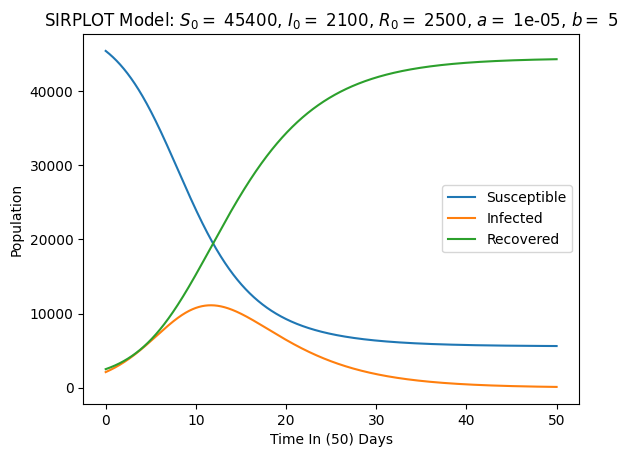

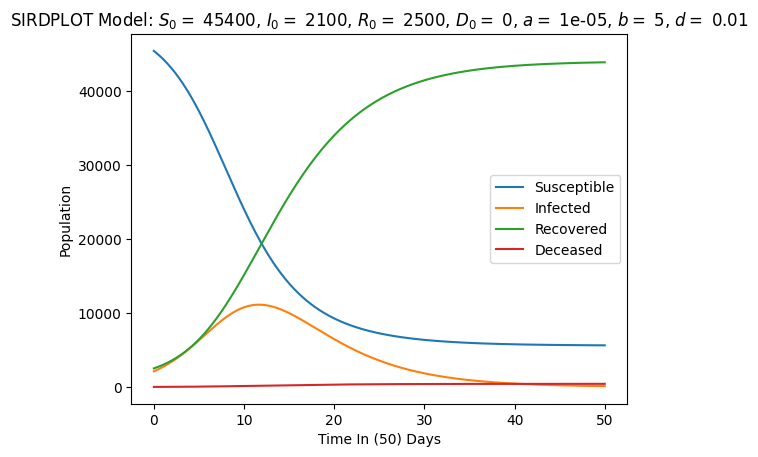

In [1054]:
Si = 45400
Ii = 2100
Ri = 2500
Di = 0
tf = 50
a = 0.00001
b = 5
d = 0.01

SIRPLOT(Si, Ii, Ri, tf, a, b)
SIRDPLOT(Si, Ii, Ri, Di, tf, a, b, d)

**<span style = "color:red;">Question 2 - Part (c) Response</span>**

In this last model of question 2 we significantly decreased the time that it takes for someone to recover from the disease. With this new time to recover the initial populations and coefficients / rates are:

- $S_{0} = 45,400$ - Initial population that is susceptible to the disease.
- $I_{0} = 2,100$ - Initial population that is currently infected with the disease.
- $R_{0} = 2,500$ - Initial population that has recovered from the disease with immunity.
- $D_{0} = 0$ - Initial population that has died from the disease.
- $a = 0.00001$ - Transmission coefficient.
- $b = 5$ - Days taken to recover from the disease.
- $d = 0.01$ - Death rate of the disease.

With these new initial coefficients / rates and the initial populations we can see that decreasing the time taken for someone to recover from the disease significantly affects the populations in these models. For starters, when we decrease the time taken for someone to recover from the disease it makes the recovered population grow at a faster rate. Decreasing the time taken for someone to recover from the disease in turn makes the max number of infected individuals in the population decrease relative to when the time taken to recover is greater. Taking this into account we also see at the end of the time in the model we see that there are still a significant amount of people that remain susceptible to the disease. Decreasing the time taken to recover also makes the susceptible population decrease at a slower rate relative to when the time taken to recover is greater.

Examining the SIRD model, we see similar trends in the susceptible, infected, and recovered populations as the SIR model. The difference between the SIR and SIRD model is again the deceased population. When we decrease the time taken for someone to recover from the disease it makes the decease population grow at a slower rate relative to when the time taken is greater. The deceased population also levels out towards the end of the model as well and this is due to more people recovering from the disease and not dying.

**<span style = "color:red;">Question 2 Synopsis</span>**

The results from parts (a) and (b) show that if we increase the recovery rate coefficient b it will correlate with a longer time for people to recover from the disease. Part (c) shows that if we decrease this coefficient then we will have a shorter time people are infected and thus people recover from the disease quicker. If we define the time taken for someone to recover from the disease as $\rho$ then the relationship between the time to recover and the recovery coefficient b is 

\begin{equation}
\rho \propto \frac{1}{b}.
\end{equation}

Equation (1) insinuates that if the value of b is small, then $\rho$ will be larger than if b is large. Thus if we wish to model a disease that takes a long time to recover then we would want b to be larger and if we want to model a disease that takes less time to recover then we would want b to be smaller.

**Question 3:** Using your SIRPLOT code above, explore what happens to the course of a disease when you change the transmission coeffient a (which happens if people self-isolate for example). Provide examples from your model in code blocks and context and explanation in textblocks.

**<span style = "color:red;">Question 3 - Part (a) Model</span>**

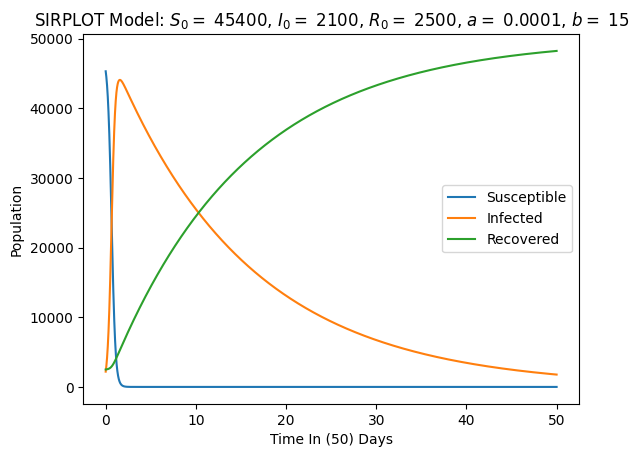

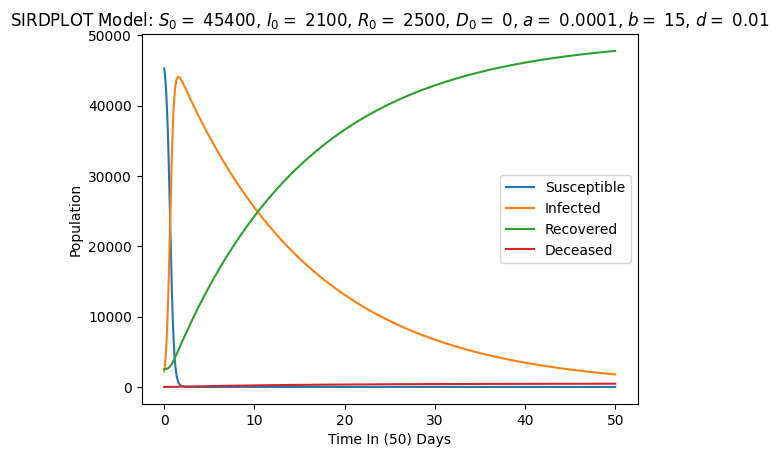

In [1055]:
Si = 45400
Ii = 2100
Ri = 2500
Di = 0
tf = 50
a = 0.0001
b = 15
d = 0.01

SIRPLOT(Si, Ii, Ri, tf, a, b)
SIRDPLOT(Si, Ii, Ri, Di, tf, a, b, d)

**<span style = "color:red;">Question 3 - Part (a) Response</span>**

In this example we are exploring what happens to our models as we change the value of our transmission coefficient. For this model the following are the initial populations and coefficients / rates:

- $S_{0} = 45,400$ - Initial population that is susceptible to the disease.
- $I_{0} = 2,100$ - Initial population that is currently infected with the disease.
- $R_{0} = 2,500$ - Initial population that has recovered from the disease with immunity.
- $D_{0} = 0$ - Initial population that has died from the disease.
- $a = 0.0001$ - Transmission coefficient.
- $b = 15$ - Days taken to recover from the disease.
- $d = 0.01$ - Death rate of the disease.

In this example specifically, we increased the transmission coefficient a by a factor of 10 to see what effect it would have on our populations. Upon immediate inspection, we can see that there is a steep decrease in the susceptible and increase in infected populations. This is because we are modeling a disease that is more contagious and this behavior is expected. The recovered population in this model tends to increase at a similar rate as other models and this because our recovery rate is still relatively small. Increasing the transmission coefficient also causes the peak of the infected population to occur earlier in the life of the model in comparison to that of models with lesser transmission coefficients.

Examining the SIRD model we see that the trends of the susceptible, infected, and recovered populations are similar to that of the SIR model. The only difference is the deceased population in the SIRD model. The deceased population grows originally at the beginning of the life of the model and flattens out towards the end of the model. The death rate in this model is still relatively small compared to that of the total population in the model.

**<span style = "color:red;">Question 3 - Part (b) Model</span>**

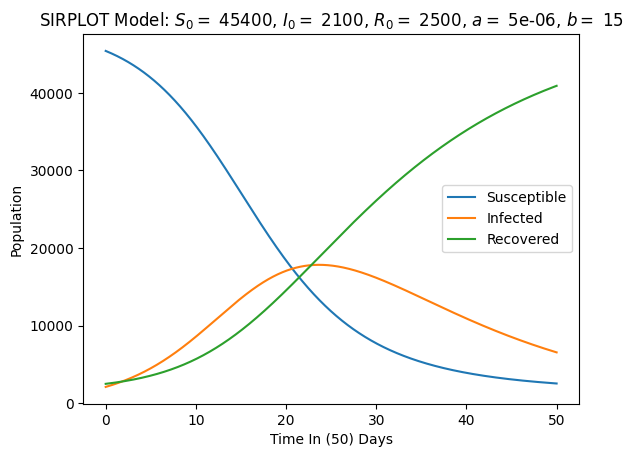

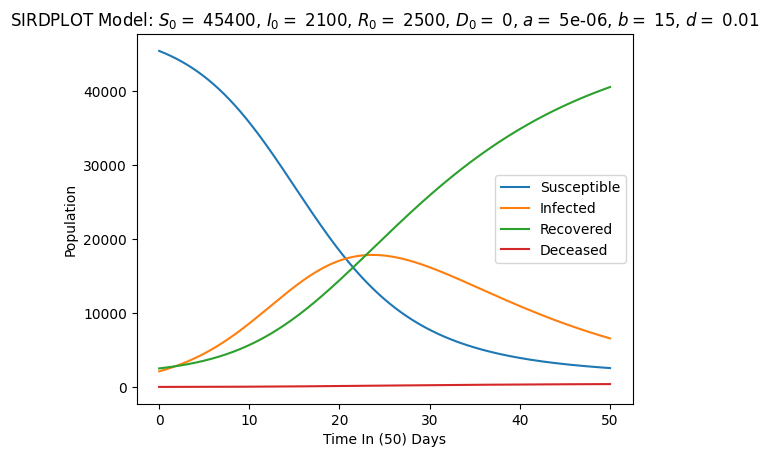

In [1056]:
Si = 45400
Ii = 2100
Ri = 2500
Di = 0
tf = 50
a = 0.000005
b = 15
d = 0.01

SIRPLOT(Si, Ii, Ri, tf, a, b)
SIRDPLOT(Si, Ii, Ri, Di, tf, a, b, d)

**<span style = "color:red;">Question 3 - Part (b) Response</span>**

In this example, we decreased the transmission coefficient by a factor of 20 compared to that of part (a). This model contains the following initial populations and coefficients / rates:

- $S_{0} = 45,400$ - Initial population that is susceptible to the disease.
- $I_{0} = 2,100$ - Initial population that is currently infected with the disease.
- $R_{0} = 2,500$ - Initial population that has recovered from the disease with immunity.
- $D_{0} = 0$ - Initial population that has died from the disease.
- $a = 0.00005$ - Transmission coefficient.
- $b = 15$ - Days taken to recover from the disease.
- $d = 0.01$ - Death rate of the disease.

Upon immediate inspection of this model we see that the rate at which the infected population grows is significantly less than that of the previous model in part (a). The susceptible population also decreases at a slower rate while the recovered rate also grows at a slower rate. This makes logical sense since people are less likely to obtain the disease and thus less people are going to recover from the disease overall. We also notice that the peak of the infected population also occurs later in the life cycle of the model compared to a model that has a more contagious disease. The peak of the infected population is also less than that of a disease that is more contagious.

The SIRD model shows that with a less contagious disease the deceased population grows at a pretty constant rate. Even though this disease is less contagious it is going to stick around in the population longer than a disease that is more contagious. Because of this we should expect more people to die from the disease and the graph of the SIRD model confirms this. At the end of the time period for this model we can see that the deceased population is still growing in comparison to a disease that is more contagious.

**<span style = "color:red;">Question 3 Synopsis</span>**

The model depicted in part (a) indicates that if we increase the transmission coefficient while keeping all of the other parameters constant corresponds to a disease that spreads quickly compared to a transmission coefficient that is smaller we should expect more people to get infected from the disease. It also shows that the peak of the infected population will occur sooner in the life cycle of the disease. If we define the rate at which people are infected by a disease as $\iota$ then the rate at which people are infected is proportional to the transmission coefficient a. Namely,

\begin{equation}
\iota \propto a.
\end{equation}

This means as the transmission coefficient increases the rate at which people are initially infected by a disease increases. Conversely as the transmission coefficient decreases we see that the rate at which people are initially infected decreases. This makes logical sense because a disease that has a transmission coefficient that is larger is going to be more contagious.

**SIR with Differential Equations**

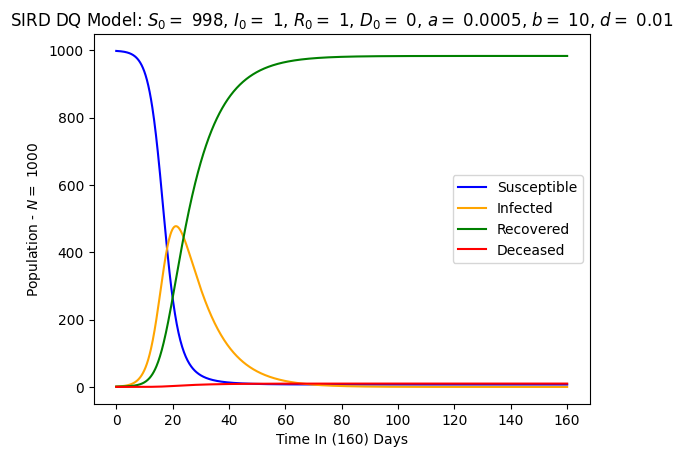

In [1057]:
# SIRD With Differential Equations In Functional Form

# SIRDDQ - SIRD model in differential equations form that plots results
# Input:
#   N - Total population in model
#   I_0 - Initial number of infected individuals
#   R_0 - Initial number of recovered individuals
#   D_0 - Initial number of deceased individuals
#   tf - Total number of days in model
#   a - Transmission coefficient
#   b - Recovery time in days
#   d - Death rate
# Algorithm:
#   * Calculate the number of susceptible individuals 
#   * Calculate the recovery coefficient
#   * Calculate the recovery rate in terms of the death rate
#   * Create a list for the time of this model
#   * Create an inner function for the differential equation that is to be solved
#   * Initialize the input parameters to the initial conditions fed in the function
#   * Solve the differential equation model with ODEint with the initial conditions and arguments
#   * Retrieve the lists of data from the solution
#   * Plot the data
# Output:
#   This function does not return any values, it produces a lot of data for a given SIRD model
def SIRDDQ(N,I_0,R_0,D_0,tf,a,b,d):
    S_0 = N - I_0 - R_0 - D_0
    b = 1 / b
    recoveryRate = 1 - d
    time = np.linspace(0,tf,1000)
    def model(y,t,N,a,b):
        S, I, R, D = y
        dSdt = -a * S * I
        dIdt = a * S * I - b * I
        dRdt = recoveryRate * (b * I)
        dDdt = d * (b * I)
        return dSdt, dIdt, dRdt, dDdt
    y_0 = S_0, I_0, R_0, D_0
    sol = odeint(model, y_0, time, args=(N,a,b))
    S, I, R, D = sol.T
    plt.plot(time, S, 'b', label='Susceptible')
    plt.plot(time, I, 'orange', label='Infected')
    plt.plot(time, R, 'g', label='Recovered')
    plt.plot(time, D, 'r', label='Deceased')
    plt.xlabel(f'Time In ({tf}) Days')
    plt.ylabel(f'Population - $N =$ {N}')
    plt.title(f'SIRD DQ Model: $S_{0} =$ {S_0}, $I_{0} =$ {I_0}, $R_{0} =$ {R_0}, $D_{0} =$ {D_0}, $a =$ {a}, $b =$ {int(1 / b)}, $d =$ {d}')
    plt.legend()
    plt.show()

N = 1000
Ii = 1
Ri = 1
Di = 0
tf = 160
a = 0.0005
b = 10
d = 0.01

SIRDDQ(N, Ii, Ri, Di, tf, a, b, d)

**Question 4:**
Look at the following implementation of SIR (adapted from the https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/) using differential equations. How is it the same and how is it different to SIRPLOT? Answer here with code and text examples.

**<span style = "color:red;">Question 4 Response</span>**

The SIR model is different from the previous model (SIRPLOT) in that this model is using coupled differential equations to solve for the population totals in the model. In the SIRPLOT model we used a for loop to solve for the population at a given time t and in the differential equation model we are solving coupled differential equations. Mathematically, these differential equations are

\begin{align}
    \frac{dS}{dt} & = -a \cdot S \cdot I \\
    \frac{dI}{dt} & = a \cdot S \cdot I - \frac{I}{b} \\
    \frac{dR}{dt} & = \frac{\alpha \cdot I}{b} \\
    \frac{dD}{dt} & = \frac{\beta \cdot I}{b}
\end{align}

where in the above, $a$ is the transmission coefficient, $b$ is the recovery time in days, $\alpha$ is the recovery rate, and $\beta$ is the death rate. $S$ and $I$ are the members of the population that are either susceptible or infected.

**<span style = "color:red;">Question 4 Code Exploration</span>**

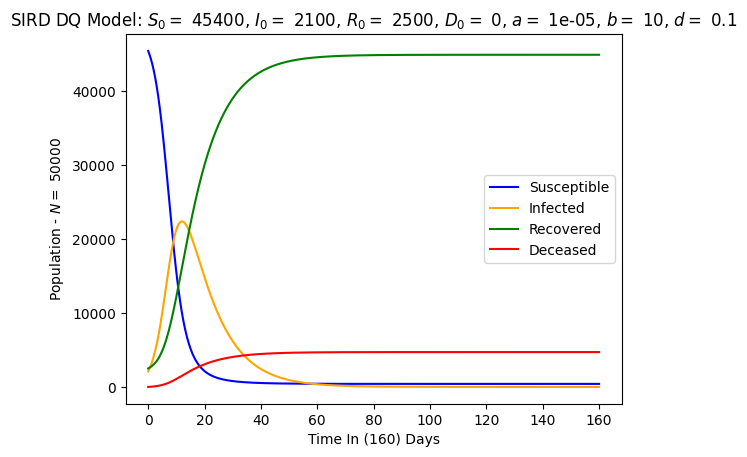

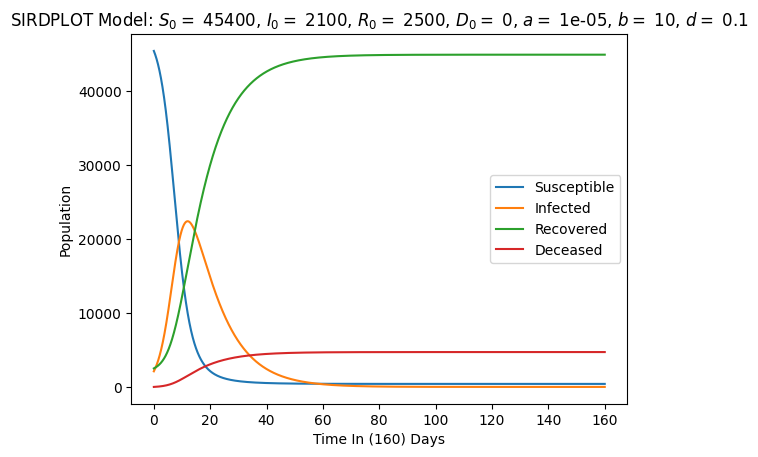

In [1058]:
N = 50000
S0 = 45400
I0 = 2100
R0 = 2500
D0 = 0
tf = 160
a = 0.00001
b = 10
d = 0.1

SIRDDQ(N,I0,R0,D0,tf,a,b,d)
SIRDPLOT(S0,I0,R0,D0,tf,a,b,d)

**<span style = "color:red;">Question 4 Response Continued</span>**

In these two examples we see that the SIRDPLOT creates the same plot as the SIRDDQ method. This is because both methods are solving the models but in different ways. We can see from this example that although each method is different they produce similar results. In the SIRDPLOT we are using what is called an Euler method to solve the equations, iterating over each value for the populations. In the SIRDDQ model we are solving the equations with the use of ODEint with incorporates different solving methods in the context of differential equations. Both methods will produce similar results, but one uses differential equations and the other does not.

**Question 5:**

Can you use this model to explore the Questions 2 and 3 above. Answer here.

**<span style = "color:red;">Question 5 Response</span>**

Yes, we can use this model to explore questions 2 and 3. We first begin by altering the recovery rate to see how it acts compared to SIRDPLOT.

**<span style = "color:red;">Question 5 Code Exploration - Recovery Rate</span>**

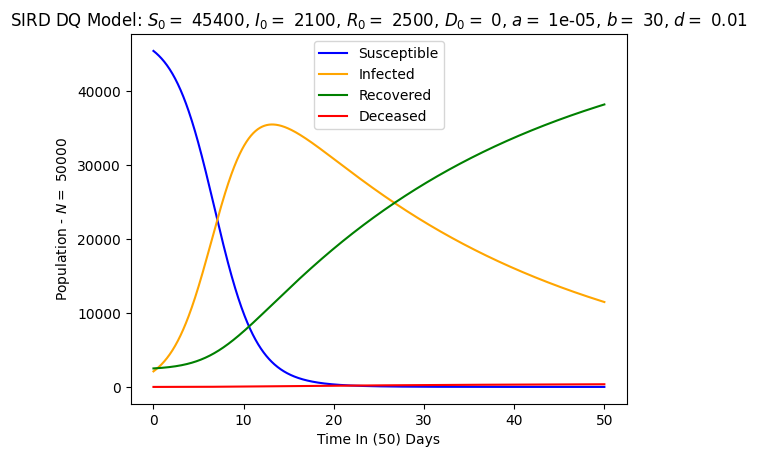

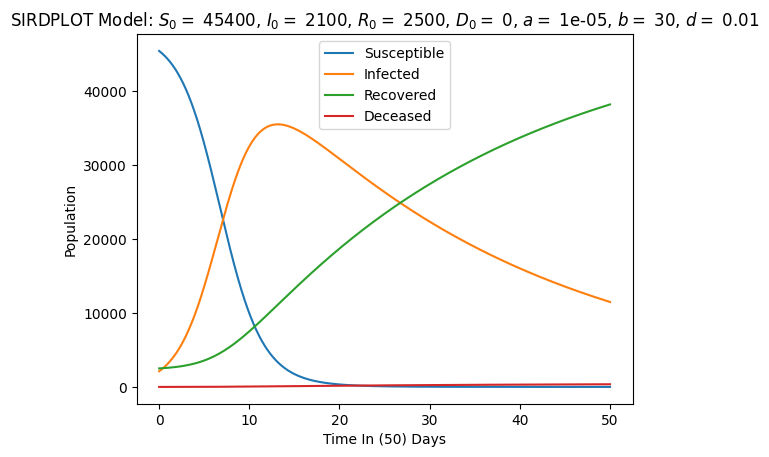

In [1059]:
# b = 30
N = 50000
S0 = 45400
I0 = 2100
R0 = 2500
D0 = 0
tf = 50
a = 0.00001
b = 30
d = 0.01

SIRDDQ(N,I0,R0,D0,tf,a,b,d)
SIRDPLOT(S0,I0,R0,D0,tf,a,b,d)

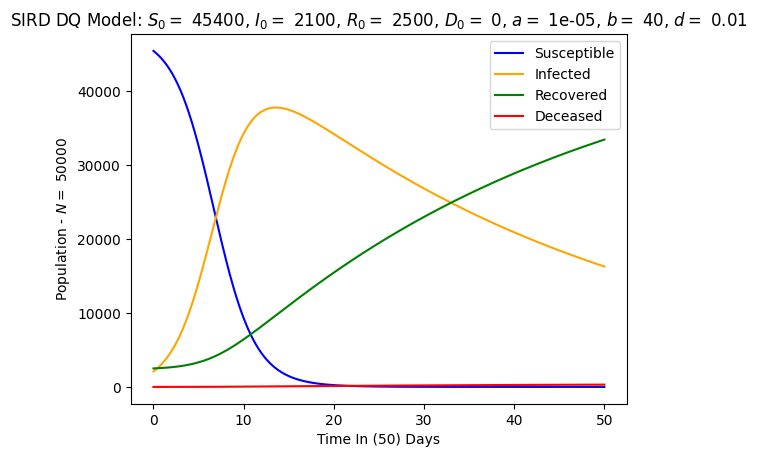

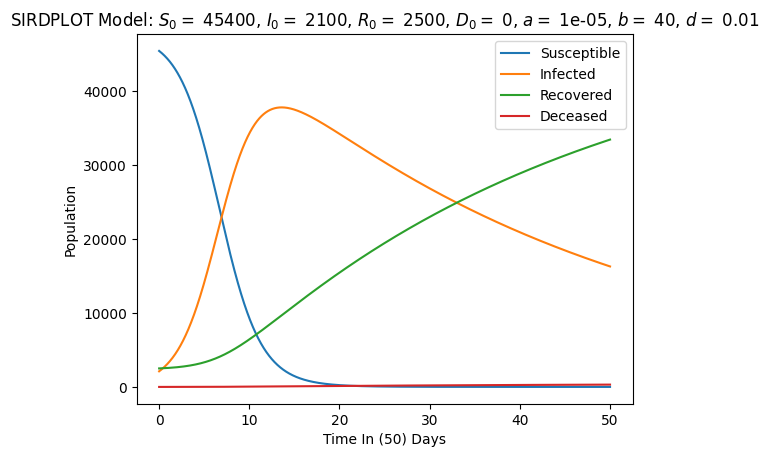

In [1060]:
# b = 40
N = 50000
S0 = 45400
I0 = 2100
R0 = 2500
D0 = 0
tf = 50
a = 0.00001
b = 40
d = 0.01

SIRDDQ(N,I0,R0,D0,tf,a,b,d)
SIRDPLOT(S0,I0,R0,D0,tf,a,b,d)

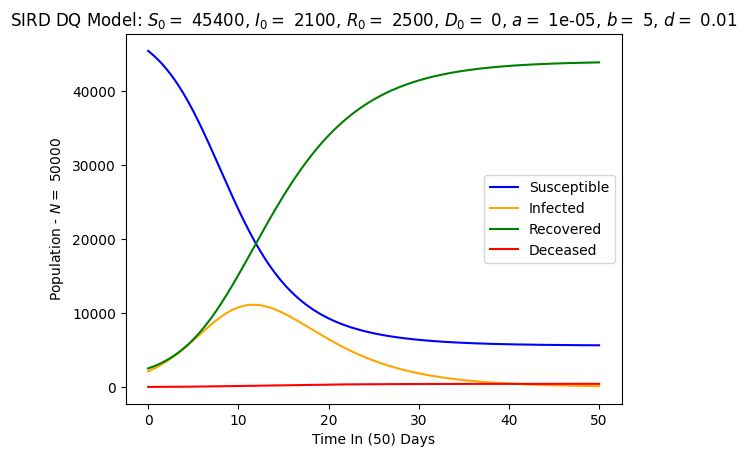

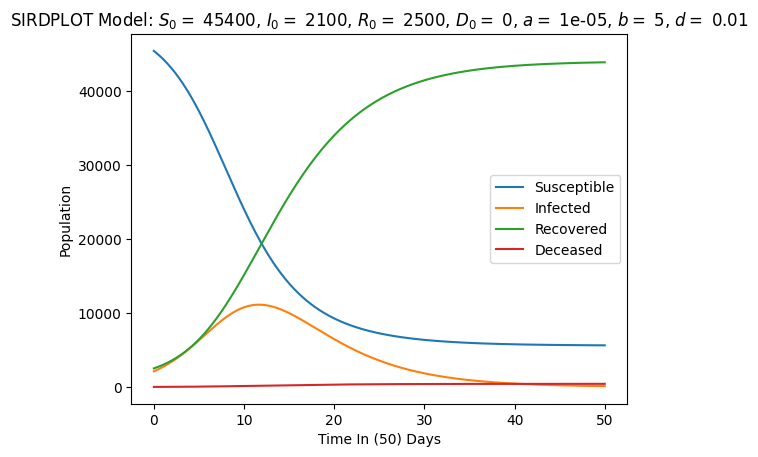

In [1061]:
# b = 5
N = 50000
S0 = 45400
I0 = 2100
R0 = 2500
D0 = 0
tf = 50
a = 0.00001
b = 5
d = 0.01

SIRDDQ(N,I0,R0,D0,tf,a,b,d)
SIRDPLOT(S0,I0,R0,D0,tf,a,b,d)

**<span style = "color:red;">Question 5 Response - Recovery Rate</span>**

We see with the above examples that both methods are suitable for solving the models with given parameters. Both models produce similar results and this is expected. We now look at doing the same but with the transmission coefficient.

**<span style = "color:red;">Question 5 Code Exploration - Transmission Coefficient</span>**

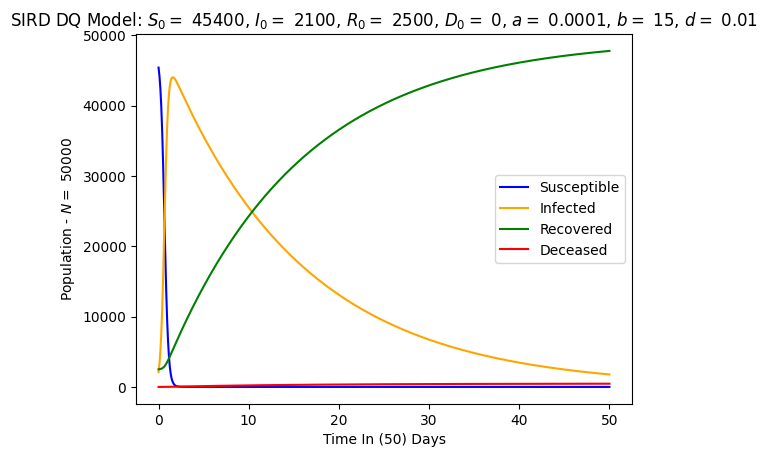

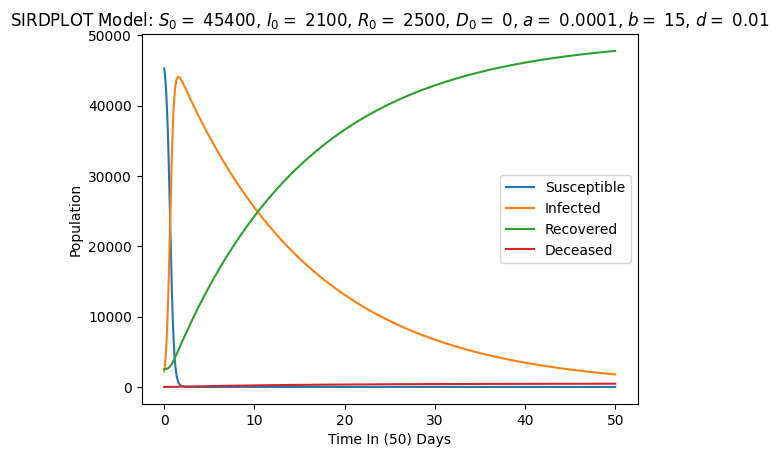

In [1062]:
# a = 0.001
N = 50000
S0 = 45400
I0 = 2100
R0 = 2500
D0 = 0
tf = 50
a = 0.0001
b = 15
d = 0.01

SIRDDQ(N,I0,R0,D0,tf,a,b,d)
SIRDPLOT(S0,I0,R0,D0,tf,a,b,d)

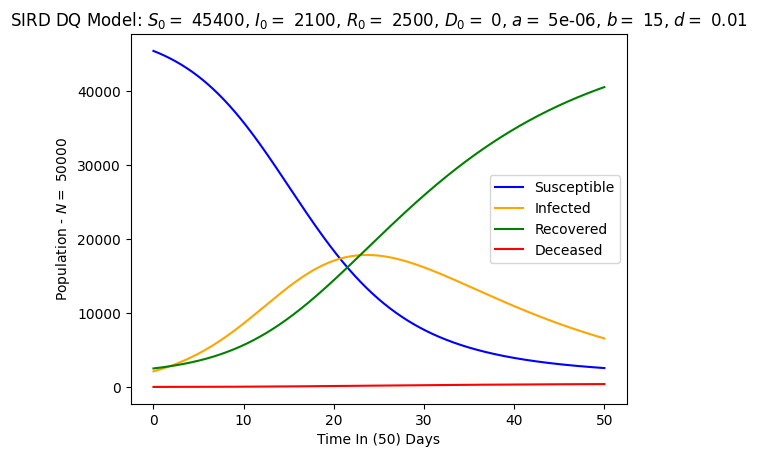

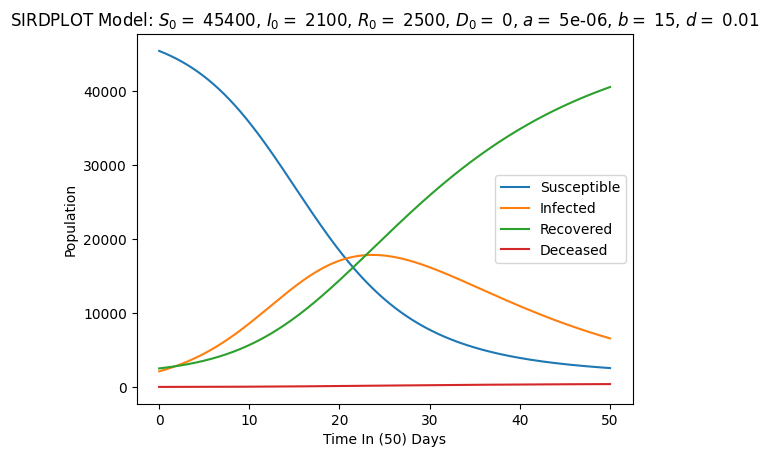

In [1063]:
# a = 0.00005
N = 50000
S0 = 45400
I0 = 2100
R0 = 2500
D0 = 0
tf = 50
a = 0.000005
b = 15
d = 0.01

SIRDDQ(N,I0,R0,D0,tf,a,b,d)
SIRDPLOT(S0,I0,R0,D0,tf,a,b,d)

**<span style = "color:red;">Question 5 Response - Transmission Coefficient</span>**

Again, we see similar results from both the differential equation model and the Euler method model. This confirms that our Euler method model is just as accurate as the differential equation model. At least with the current time steps of both models.

**SIR with Matrices**

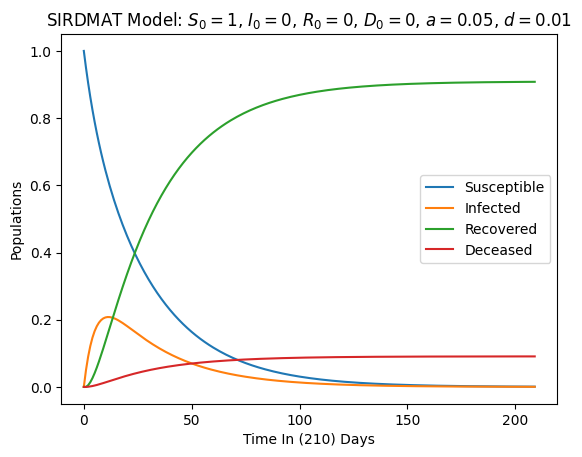

In [1064]:
# SIRDMAT - SIRD model in matrix form
# Input:
#   S - Percentage of the population that is initially susceptible
#   I - Percentage of the population that is initially infected
#   R - Percentage of the population that is initially recovered
#   D - Percentage of the population that is initially deceased
#   tf - Time period in days for the model
#   a - Transmission coefficient
#   fi - Percentage of people that recover with full immunity
#   ni - Percentage of people that do not recover with full immunity
#   d - Death rate
# Algorithm:
#   * Calculate the amount of people in a percentage who remain susceptible
#   * Create the dynamics matrix
#   * Create a matrix for the initial state of the system where everyone is healthy
#   * Initialize the trajectory with zeros
#   * Iterate over the days performing matrix multiplication with A and the stateTraj matrix
#   * Iterate over the stateTraj matrix and plot the results
# Output:
#   This function plots the results of a SIRD model using matrices, it does not return a value
def SIRDMAT(S, I, R, D, tf, a, fi, ni, d):
    aS = 1 - a
    A = np.matrix([[aS,ni,0,0],[ni + d,(1-(ni + fi + d)),0,0],[0,fi,1,0],[0,d,0,1]])
    x1 = np.array([S,I,R,D])
    stateTraj = np.hstack([np.vstack(x1),np.zeros((4,tf - 1))])
    for t in range(tf - 1):
        stateTraj[:,t + 1] = np.matmul(A,stateTraj[:,t])
    for i in range(len(stateTraj)):
        plt.plot(range(tf),stateTraj[i])
    plt.xlabel(f'Time In ({tf}) Days')
    plt.ylabel(f'Populations')
    plt.title(f'SIRDMAT Model: $S_{0} =${x1[0]}, $I_{0} =${x1[1]}, $R_{0} =${x1[2]}, $D_{0} =${x1[3]}, $a =${a}, $d =${d}')
    plt.legend(["Susceptible","Infected","Recovered","Deceased"])
    plt.show()

SIRDMAT(1, 0, 0, 0, 210, 0.05, 0.1, 0.04, 0.01)

**Question 6:**
How is this implementation the same and different than SIRPLOT and the differential equation SIRmodel? Can you explore changes in the transmission coefficent and recovery rate the same way? Answer here.

**<span style = "color:red;">Question 6 Response</span>**

This implementation is different from the SIRDPLOT and differential equation SIRD model in that this implementation utilizes matrices to model the populations. Particularly, this model is not having someone directly feed in parameters like the percentage of the population that is initially susceptible, infected, etc. In this implementation we are creating populations that are percentages of the population instead of just giving the model a direct number for initial values. We of course can still explore changing the transmission coefficient as well as the recovery rate. They are just going to be different for this exact implementation compared to that of the previous ones. We firs start with changing the transmission coefficient of each model.

**<span style = "color:red;">Question 6 Code Exploration - Transmission Coefficient</span>**

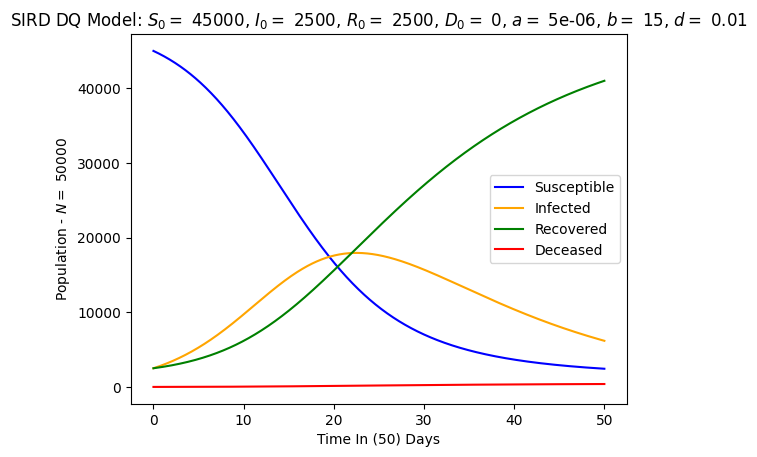

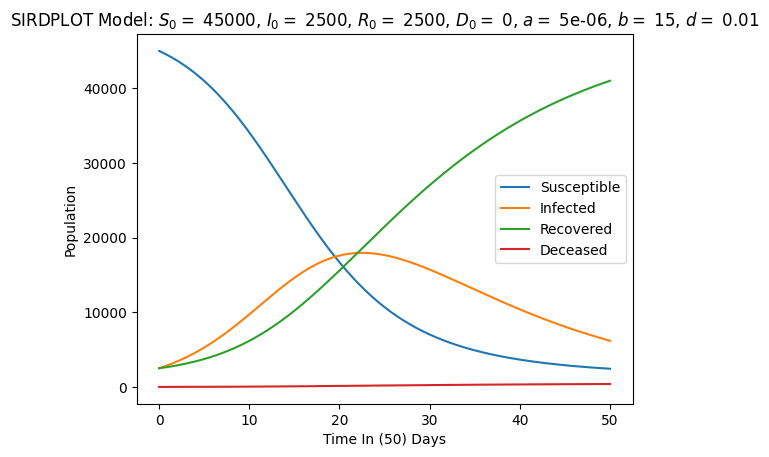

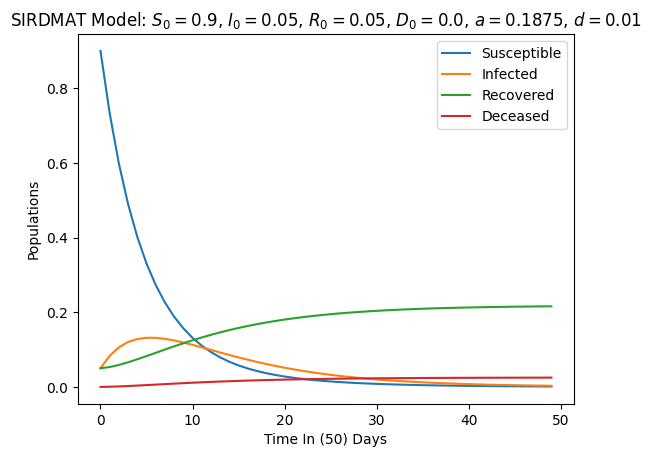

In [1065]:
N = 50000
S0 = 45000
s0 = S0 / N
I0 = 2500
i0 = I0 / N
R0 = 2500
r0 = R0 / N
D0 = 0
d0 = D0 / N
tf = 50
a = 0.000005
aa = (a * N) * 0.75
b = 15
fb = 1 / b
nb = 0.5 * fb
d = 0.01

SIRDDQ(N,I0,R0,D0,tf,a,b,d)
SIRDPLOT(S0,I0,R0,D0,tf,a,b,d)
SIRDMAT(s0, i0, r0, d0, tf, aa, fb, nb, d)

**<span style = "color:red;">Question 6 Transmission Coefficient Response</span>**

In the above example, I attempted to find a way to model the three separate implementations in a way that could be similar for all three. For the matrix dependent model I fed the parameters into it based on the parameters for the other models. This didn't produce the same results but it did produce sensible results. We now move on to examining changed the recovery rate in this model.

**<span style = "color:red;">Question 6 Code Exploration - Recovery Rate</span>**

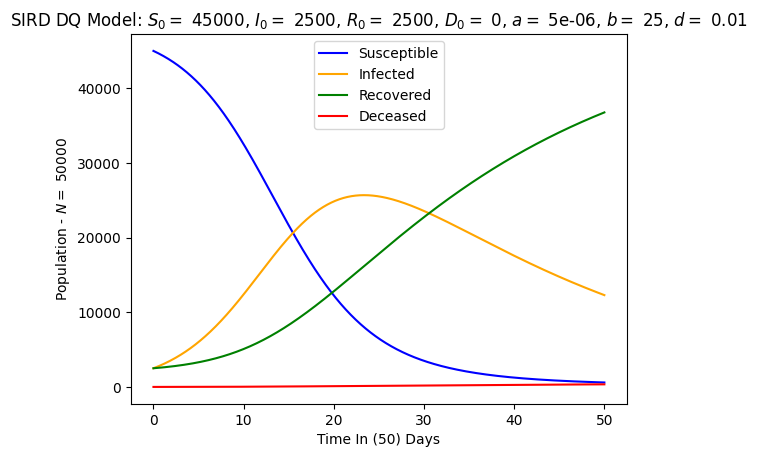

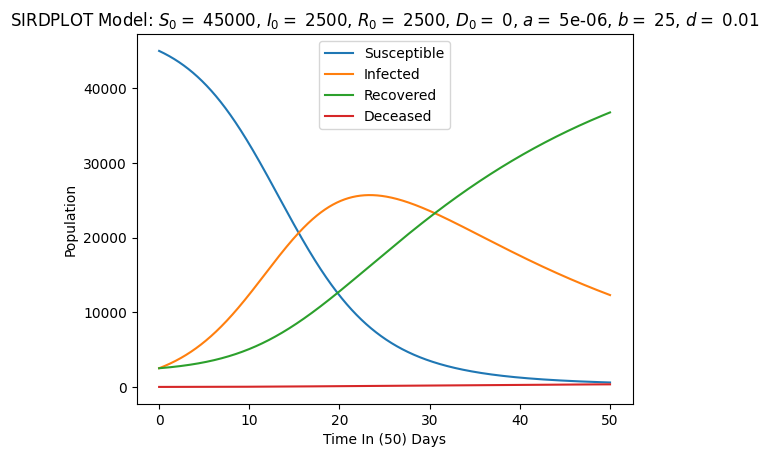

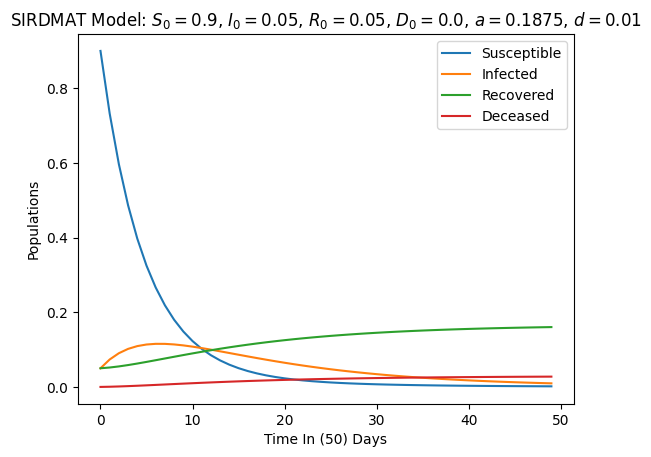

In [1066]:
N = 50000
S0 = 45000
s0 = S0 / N
I0 = 2500
i0 = I0 / N
R0 = 2500
r0 = R0 / N
D0 = 0
d0 = D0 / N
tf = 50
a = 0.000005
aa = (a * N) * 0.75
b = 25
fb = 1 / b
nb = 0.5 * fb
d = 0.01

SIRDDQ(N,I0,R0,D0,tf,a,b,d)
SIRDPLOT(S0,I0,R0,D0,tf,a,b,d)
SIRDMAT(s0, i0, r0, d0, tf, aa, fb, nb, d)

**<span style = "color:red;">Question 6 Recovery Rate Response</span>**

Here we changed the recovery rate for this model. The matrix implementation is again having its parameters calculated off of the SIRDPLOT and SIRDDQ implementations. We again don't get the exact same results but we at least get results that are sensible.

**Question 7:**
What are the advantages and disadvantages of this matrix model?  Answer here.

**<span style = "color:red;">Question 7 Response</span>**

An advantage of the matrix model is that you can model a disease being spread based upon the percentages of the populations directly. The other models did not allow this. The matrix model is also less code and it appears that it took less effort to produce the results in the model. We can also incorporate how many people recover from the disease with immunity and without immunity in the matrix model. This is something that we couldn't do prior.

A disadvantage of the matrix model is that you can't directly feed into the model sensible recovery rates. In the previous implementations we were able to define the recovery rate based upon the number of days that it took to recover from the disease. In this implementation it is not as straight forward to do so. The transmission coefficient is also harder to get the same as the previous models. 